In [1]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV  # Import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report  # Import confusion_matrix and classification_report
import numpy as np
import matplotlib.pyplot as plt  # For plotting the confusion matrix
from scipy.stats import uniform, loguniform
import seaborn as sns
from sklearn.preprocessing import StandardScaler


In [2]:
mnist = (np.load("mnist.npz"))
print(mnist)

NpzFile 'mnist.npz' with keys: x_test, x_train, y_train, y_test


In [3]:
scaler = StandardScaler()
x_test, x_train, y_train, y_test = mnist["x_test"].reshape(-1, 28*28), mnist["x_train"].reshape(-1, 28*28), mnist["y_train"], mnist["y_test"]
x_test = scaler.fit_transform(x_test)
x_train = scaler.fit_transform(x_train)

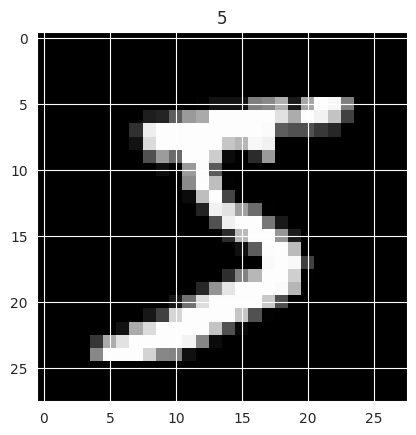

In [4]:
plt.title(mnist["y_train"][0])
plt.imshow(mnist["x_train"][0], cmap='gray')
plt.show()

In [5]:
n_tuning_samples = 20000  # Desired size of the tuning subset

X_train_tuning, _, y_train_tuning, _ = train_test_split(
    x_train, y_train, train_size=n_tuning_samples, stratify=y_train, random_state=42
)

In [6]:
param_grid_C = {'C': [0.1, 1, 10]}  # Grid search for C
grid_search_C = RandomizedSearchCV(
    SVC(kernel='rbf', gamma='scale'),  # Fix gamma to 'scale'
    param_grid_C,
    cv=3,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1,
    random_state=42,
)

# grid_search_C.fit(X_train_tuning, y_train_tuning)  # Use your tuning subset
grid_search_C.fit(X_train_tuning, y_train_tuning)  # Use your tuning subset

best_C = grid_search_C.best_params_['C']
print(f"Best C found: {best_C}")

Fitting 3 folds for each of 3 candidates, totalling 9 fits


/home/arash/.local/lib/python3.10/site-packages/sklearn/model_selection/_search.py:317: UserWarning: The total space of parameters 3 is smaller than n_iter=10. Running 3 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


KeyboardInterrupt: 

In [ ]:
param_grid_gamma = {'gamma': [0.001, 0.01, 0.1, 1]}  # Grid search for gamma
grid_search_gamma = RandomizedSearchCV(
    SVC(kernel='rbf', C=best_C),  # Fix C to the best value found
    param_grid_gamma,
    cv=3,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1,
    random_state=42,
)

grid_search_gamma.fit(X_train_tuning, y_train_tuning)

best_gamma = grid_search_gamma.best_params_['gamma']
print(f"Best gamma found: {best_gamma}")

In [9]:
rbf_svm = SVC(kernel='rbf', C=best_C, gamma=best_gamma)  # Create an SVM classifier with RBF kernel
rbf_svm.fit(x_train, y_train)  # Train the model

SVC(C=10, gamma=0.001)

In [11]:
y_pred_rbf = rbf_svm.predict(x_test)  # Predictions with RBF kernel
accuracy_rbf = accuracy_score(y_test, y_pred_rbf)
cm_rbf = confusion_matrix(y_test, y_pred_rbf)

In [12]:
print("RBF Kernel:")
print("Accuracy:", accuracy_rbf)
print("Confusion Matrix:\n", cm_rbf)
print(classification_report(y_test, y_pred_rbf)) # Precision, recall, F1

RBF Kernel:
Accuracy: 0.9724
Confusion Matrix:
 [[ 967    0    3    2    1    2    2    1    2    0]
 [   0 1128    3    0    0    1    2    1    0    0]
 [   6    3 1001    0    2    0    1   13    5    1]
 [   0    0    3  982    1    8    0    8    7    1]
 [   0    0    8    0  953    1    3    7    2    8]
 [   3    0    1    8    2  865    4    4    4    1]
 [   5    2    0    0    3    8  935    3    2    0]
 [   0    4   11    2    1    1    0 1000    0    9]
 [   3    2    5    5    4    8    2    8  931    6]
 [   1    5    4    8   12    3    0   12    2  962]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.96      0.97      0.97      1032
           3       0.98      0.97      0.97      1010
           4       0.97      0.97      0.97       982
           5       0.96      0.97      0.97       892
           6       0.99      0.98      0.9

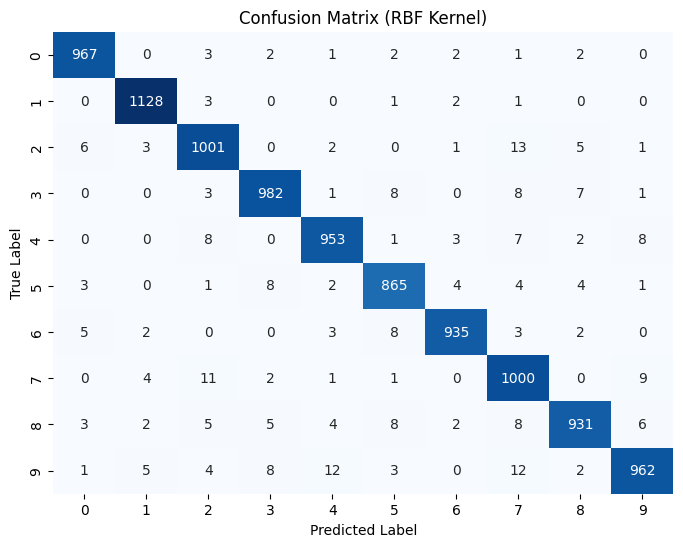

In [13]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rbf, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=np.unique(y_train), yticklabels=np.unique(y_train)) # Nicer plot
plt.title("Confusion Matrix (RBF Kernel)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [6]:
param_grid_C = {'C': [0.1, 1, 10]}  # Grid search for C
grid_search_C = RandomizedSearchCV(
    SVC(kernel='linear', gamma='scale'),  # Fix gamma to 'scale'
    param_grid_C,
    cv=3,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1,
    random_state=42,
)

# grid_search_C.fit(X_train_tuning, y_train_tuning)  # Use your tuning subset
grid_search_C.fit(X_train_tuning, y_train_tuning)  # Use your tuning subset

best_C = grid_search_C.best_params_['C']
print(f"Best C found: {best_C}")

Fitting 3 folds for each of 3 candidates, totalling 9 fits


/home/arash/.local/lib/python3.10/site-packages/sklearn/model_selection/_search.py:317: UserWarning: The total space of parameters 3 is smaller than n_iter=10. Running 3 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best C found: 0.1


In [7]:
linear_svm = SVC(kernel='linear', C=best_C)  # Create an SVM classifier with linear kernel
linear_svm.fit(x_train, y_train)  # Train the model

SVC(C=0.1, kernel='linear')

In [9]:
y_pred_linear = linear_svm.predict(x_test)  # Predictions with linear kernel
accuracy_linear = accuracy_score(y_test, y_pred_linear)
cm_linear = confusion_matrix(y_test, y_pred_linear)

In [10]:
print("linear Kernel:")
print("Accuracy:", accuracy_linear)
print("Confusion Matrix:\n", cm_linear)
print(classification_report(y_test, y_pred_linear)) # Precision, recall, F1

linear Kernel:
Accuracy: 0.9376
Confusion Matrix:
 [[ 958    0    5    2    1    7    5    1    1    0]
 [   0 1117    6    3    0    1    3    1    4    0]
 [   6   10  966   12    5    4    7    7   15    0]
 [   4    0   16  950    1   14    2    5   14    4]
 [   2    2   10    1  937    0    5    4    4   17]
 [   8    3    4   41    5  797   12    1   19    2]
 [  13    4   13    1    7   18  900    0    2    0]
 [   1    8   21   12    7    0    0  959    0   20]
 [   7    6    7   25    7   24    7    8  873   10]
 [   9    6    3    8   28    5    0   22    9  919]]
              precision    recall  f1-score   support

           0       0.95      0.98      0.96       980
           1       0.97      0.98      0.98      1135
           2       0.92      0.94      0.93      1032
           3       0.90      0.94      0.92      1010
           4       0.94      0.95      0.95       982
           5       0.92      0.89      0.90       892
           6       0.96      0.94      

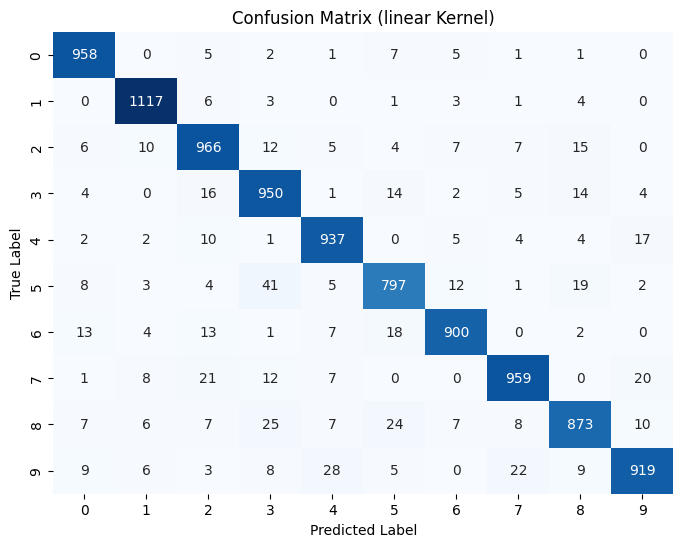

In [11]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm_linear, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=np.unique(y_train), yticklabels=np.unique(y_train)) # Nicer plot
plt.title("Confusion Matrix (linear Kernel)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()